Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

 Load Dataset

In [ ]:
df = pd.read_csv('self_driving_lane_detection_dataset.csv')
df.head()

,frame_id,vehicle_speed,lane_curvature,lane_visibility,road_type,weather_condition,camera_angle,lane_detected,left_lane_position,right_lane_position
0,1,64.967142,0.432151,0.055666,rural,foggy,0.884956,1,-1.647407,1.751579
1,2,58.617357,0.469450,0.985768,highway,foggy,7.322060,1,-1.270049,1.588213
2,3,66.476885,0.440262,0.800018,city,clear,138.198318,1,-1.924660,1.487764
3,4,75.230299,0.511042,0.868809,city,snowy,15.067293,0,-2.247331,1.818538
4,5,57.658466,0.619718,0.694294,city,rainy,167.043934,1,-2.178181,1.535435


Data Cleaning

In [ ]:
df = df.drop_duplicates()

Data Preprocessing

In [ ]:
 #Step 4: Data Preprocessing
#python
#Copy
#Edit
# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['road_type', 'weather_condition'], drop_first=True)

# Feature and target split
X = df.drop(['frame_id', 'lane_detected'], axis=1)
y = df['lane_detected']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Exploratory Data Analysis (EDA)
1)Univariate Analysis

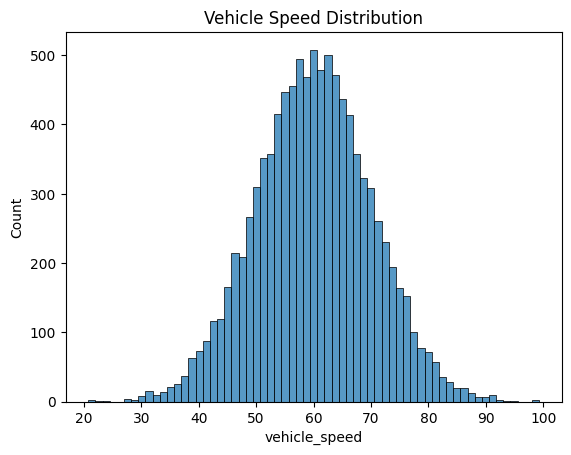

In [ ]:
sns.histplot(df['vehicle_speed'])
plt.title('Vehicle Speed Distribution')
plt.show()

2)Bivariate Analysis

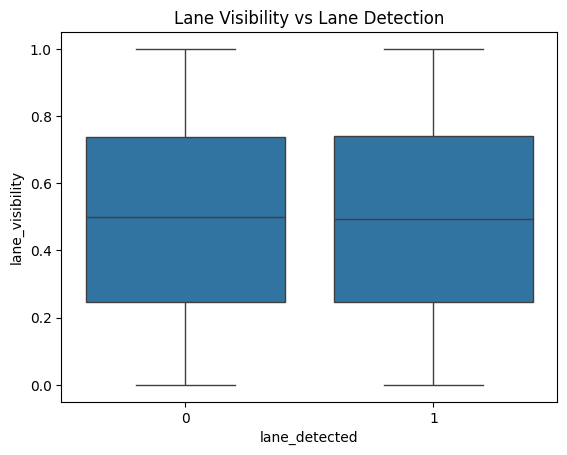

In [ ]:
sns.boxplot(x='lane_detected', y='lane_visibility', data=df)
plt.title('Lane Visibility vs Lane Detection')
plt.show()

3)Multivariate Analysis

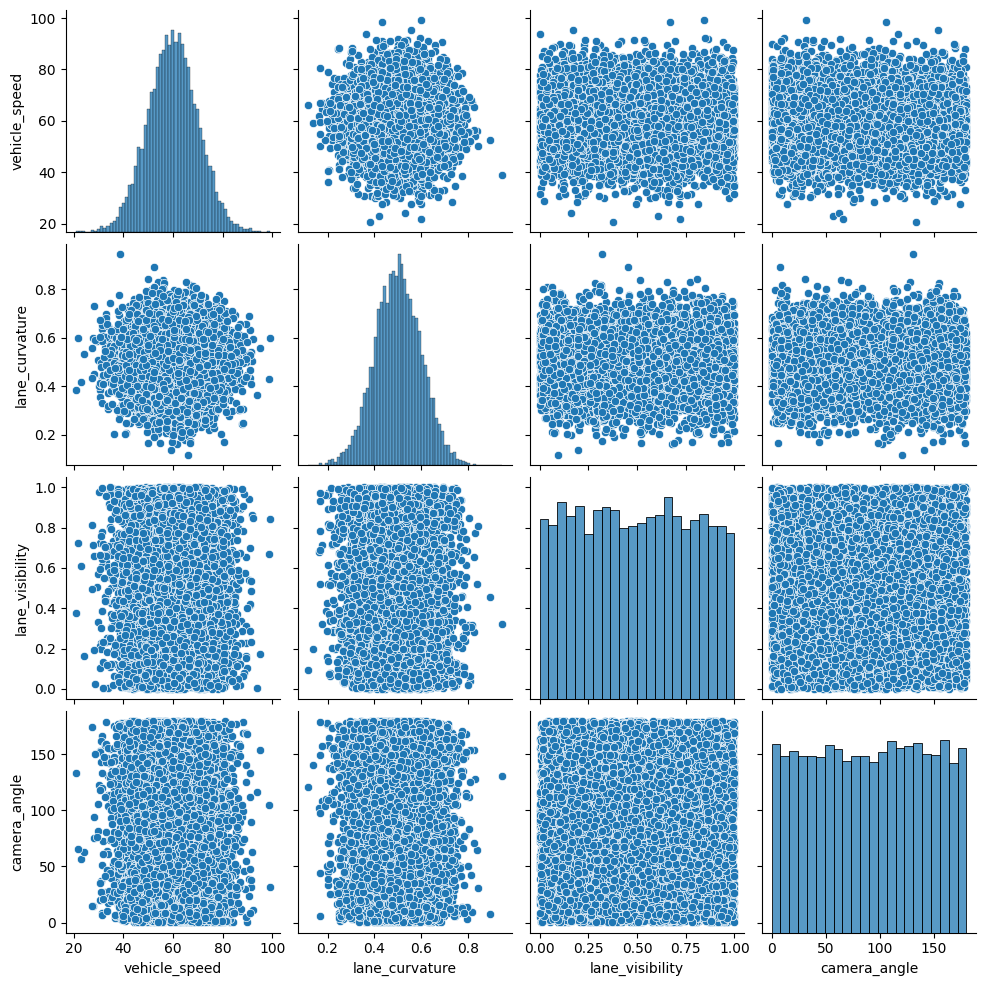

In [ ]:
sns.pairplot(df[['vehicle_speed', 'lane_curvature', 'lane_visibility', 'camera_angle']])
plt.show()

Correlation Matrix

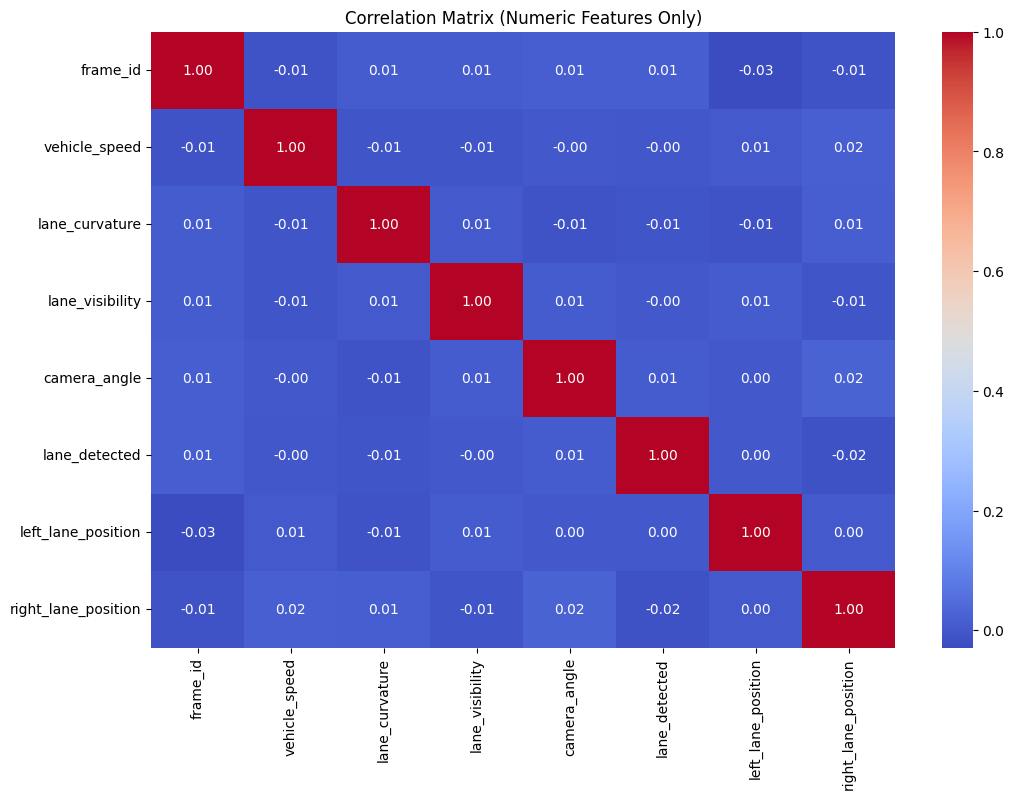

In [ ]:
# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now compute and plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()


Train-Test Split (with Preprocessing)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns
X = df.drop(['frame_id', 'lane_detected'], axis=1)
y = df['lane_detected']

# Encode categorical variables (if not already done)
X = pd.get_dummies(X, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train a Model (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Convert predicted probabilities to 0/1
y_pred_binary = (y_pred > 0.5).astype(int)


 Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))


Confusion Matrix:
[[353 641]
 [336 670]]


PCA – Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("PCA Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


PCA Explained Variance Ratio:
[0.1367967  0.12137935]


Regularization (Ridge & Lasso)

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

y = mx + b (Model Equation)

In [ ]:
print("Slope (m):", model.coef_)
print("Intercept (b):", model.intercept_)


Slope (m): [-0.00407368 -0.00169723 -0.000171    0.00481416 -0.00326047 -0.00311657
 -0.00265535  0.00452444  0.00077527 -0.00528977  0.00010464]
Intercept (b): 0.5046170458009136


XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_xgb = xgb.predict(X_test)

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_xgb))


XGBoost Confusion Matrix:
[[474 520]
 [482 524]]


Evaluation Metrics (MSE, RMSE, R²)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.250078150203615
RMSE: 0.5000781440971152
R² Score: -0.0003486133645413947


Manual Gradient Descent (Example)

In [ ]:
# Use a single feature for simplicity
X_simple = X_train[:, 0].reshape(-1, 1)
y_simple = y_train.values.reshape(-1, 1)

# Initialize weights
m, b = 0, 0
L = 0.01  # Learning rate
epochs = 1000

# Gradient descent loop
for _ in range(epochs):
    y_hat = m * X_simple + b
    D_m = -2 * np.sum(X_simple * (y_simple - y_hat)) / len(X_simple)
    D_b = -2 * np.sum(y_simple - y_hat) / len(X_simple)
    m -= L * D_m
    b -= L * D_b

# ✅ Proper print without indexing
print(f"Gradient Descent Result: y = {m:.4f}x + {b:.4f}")


Gradient Descent Result: y = -0.0042x + 0.5046


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-validation Scores: [-0.0003869  -0.00197832 -0.00213949 -0.00446406 -0.00485824]
Mean CV Score: -0.002765401239933185


Covariance Matrix

In [ ]:
# Select only numeric columns for covariance calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute and print the covariance matrix
print("Covariance Matrix:\n")
print(numeric_df.cov())


Covariance Matrix:

                         frame_id  vehicle_speed  lane_curvature  \
frame_id             8.334167e+06    -286.425230        3.005533   
vehicle_speed       -2.864252e+02     100.693675       -0.008592   
lane_curvature       3.005533e+00      -0.008592        0.010020   
lane_visibility      7.490836e+00      -0.023996        0.000151   
camera_angle         1.920106e+03      -0.082426       -0.059990   
lane_detected        2.009216e+01      -0.024674       -0.000264   
left_lane_position  -1.713910e+01       0.010417       -0.000225   
right_lane_position -6.750122e+00       0.032747        0.000251   

                     lane_visibility  camera_angle  lane_detected  \
frame_id                    7.490836   1920.105676      20.092159   
vehicle_speed              -0.023996     -0.082426      -0.024674   
lane_curvature              0.000151     -0.059990      -0.000264   
lane_visibility             0.082325      0.137454      -0.000081   
camera_angle          